# IT Specialist Salary Prediction
## Description
The "IT Specialist Salary Prediction" project is designed to create a machine learning model that predicts the salaries of IT specialists based on a comprehensive survey. The project is based on the data gathrered from IT professionals through a detailed survey covering demographics, professional backgrounds, technical skills, education, and salary information, sourced from Kaggle [IT Salary Survey for EU region(2020)](https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region). 

The primary objective of the project is to gain insights and knowledge about machine learning models capable of performing regression tasks. The project contains the following elements:

* **Data Collection**: The project gathers data from IT professionals through a detailed survey covering demographics, professional backgrounds, technical skills, education, and salary information, sourced from Kaggle, a renowned data science community and dataset repository.

* **Exploratory Data Analysis (EDA)**: The project includes thorough EDA to gain insights into the dataset, uncover patterns, and understand the relationships between variables.

* **Data Preparation**: Collected data undergoes extensive preprocessing, including cleaning, handling missing values, and encoding categorical variables.

* **Machine Learning Models**: The heart of the project is the development and training of machine learning models for salary prediction. This includes the application of Linear Regression and XGBoost Regressor models.

* **Model Deployment**: The final model is deployed using Flask interface that allows usint REST Api for getting the salary predictions.

* **Containerization**: The project code is containerized using Docker to ensure portability and ease of deployment.


### Requirements
Make sure you have the following python modules installed before running the notebook:
```shell    
    pip install pandas
    pip install numpy
    pip install scikit-learn
    pip install xgboost
    pip install seaborn
```

## Exploratory Data Analysis

In [892]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
# There is some sensitive info that is being printed in the warning
# So ignoring the warnings for now
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [893]:
pd.set_option('display.max_rows', 500)

In [894]:
df = pd.read_csv('IT Salary Survey EU  2020.csv')
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


## Column renaming

In [895]:
df.columns = [re.sub('\W+','_',c.lower()) for c in df.columns]
df.head(5)

,timestamp,age,gender,city,position_,total_years_of_experience,years_of_experience_in_germany,seniority_level,your_main_technology_programming_language,other_technologies_programming_languages_you_use_often,...,annual_bonus_stocks_one_year_ago_only_answer_if_staying_in_same_country,number_of_vacation_days,employment_status,сontract_duration,main_language_at_work,company_size,company_type,have_you_lost_your_job_due_to_the_coronavirus_outbreak_,have_you_been_forced_to_have_a_shorter_working_week_kurzarbeit_if_yes_how_many_hours_per_week,have_you_received_additional_monetary_support_from_your_employer_due_to_work_from_home_if_yes_how_much_in_2020_in_eur
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [896]:
df.columns

Index(['timestamp', 'age', 'gender', 'city', 'position_',
       'total_years_of_experience', 'years_of_experience_in_germany',
       'seniority_level', 'your_main_technology_programming_language',
       'other_technologies_programming_languages_you_use_often',
       'yearly_brutto_salary_without_bonus_and_stocks_in_eur',
       'yearly_bonus_stocks_in_eur',
       'annual_brutto_salary_without_bonus_and_stocks_one_year_ago_only_answer_if_staying_in_the_same_country',
       'annual_bonus_stocks_one_year_ago_only_answer_if_staying_in_same_country',
       'number_of_vacation_days', 'employment_status', 'сontract_duration',
       'main_language_at_work', 'company_size', 'company_type',
       'have_you_lost_your_job_due_to_the_coronavirus_outbreak_',
       'have_you_been_forced_to_have_a_shorter_working_week_kurzarbeit_if_yes_how_many_hours_per_week',
       'have_you_received_additional_monetary_support_from_your_employer_due_to_work_from_home_if_yes_how_much_in_2020_in_eur'],
   

In [897]:
renamed_columns = {
    'total_years_of_experience': 'experience_years',
    'years_of_experience_in_germany': 'experience_years_germany',
    'your_main_technology_programming_language': 'main_technology',
    'other_technologies_programming_languages_you_use_often': 'other_technologies',
    'yearly_brutto_salary_without_bonus_and_stocks_in_eur': 'salary_brutto_without_bonuses',
    'yearly_bonus_stocks_in_eur': 'yearly_bonus',
    'number_of_vacation_days': 'vacation_days',
    'main_language_at_work': 'language_at_work',
    'position_': 'position'
}
df.rename(columns=renamed_columns, inplace=True)
df.iloc[0]

timestamp                                                                                                                            24/11/2020 11:14:15
age                                                                                                                                                 26.0
gender                                                                                                                                              Male
city                                                                                                                                              Munich
position                                                                                                                               Software Engineer
experience_years                                                                                                                                       5
experience_years_germany                                                          

## Explore target column
- First, we check the values of the salary and bonus tables
- Then we create a new column that combines the salary and the bonus columns
- Finally, we plot the histogram of 

### Display highest values

In [898]:
df['salary_brutto_without_bonuses'].isnull().sum()

0

In [899]:
df.salary_brutto_without_bonuses.sort_values(ascending=False)

473     1.000000e+11
853     5.000000e+08
778     8.500000e+05
576     3.000000e+05
630     2.500000e+05
            ...     
1135    1.150000e+04
770     1.100000e+04
366     1.016400e+04
883     1.000100e+04
982     1.000100e+04
Name: salary_brutto_without_bonuses, Length: 1253, dtype: float64

In [900]:
pd.to_numeric(df['yearly_bonus'], errors='coerce').fillna(0).sort_values(ascending=False)

853    5.000000e+09
564    1.150000e+06
630    4.500000e+05
966    2.000000e+05
279    2.000000e+05
           ...     
193    0.000000e+00
797    0.000000e+00
798    0.000000e+00
799    0.000000e+00
335    0.000000e+00
Name: yearly_bonus, Length: 1253, dtype: float64

In [901]:
df['salary_brutto'] = df['salary_brutto_without_bonuses'].astype(int) + pd.to_numeric(df['yearly_bonus'], errors='coerce').fillna(0)
df['salary_brutto'].sort_values(ascending=False)

473     1.000000e+11
853     5.500000e+09
564     1.240000e+06
778     9.450000e+05
630     7.000000e+05
            ...     
1135    1.150000e+04
770     1.100000e+04
366     1.016400e+04
982     1.000100e+04
883     1.000100e+04
Name: salary_brutto, Length: 1253, dtype: float64

### Plot salary histograms

<Axes: xlabel='salary_brutto', ylabel='Count'>

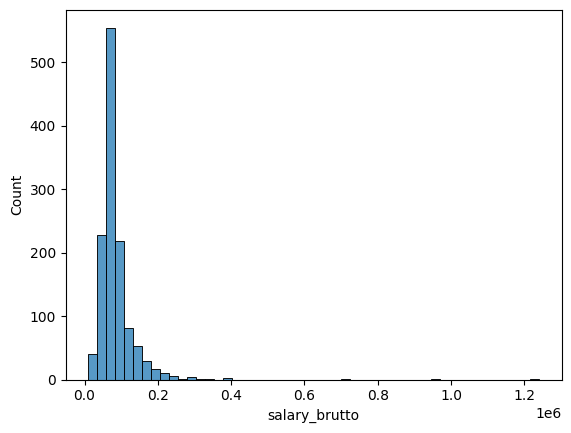

In [902]:
sns.histplot(df['salary_brutto'][df.salary_brutto < 2*(10**6)], bins=50)

<Axes: xlabel='salary_brutto', ylabel='Count'>

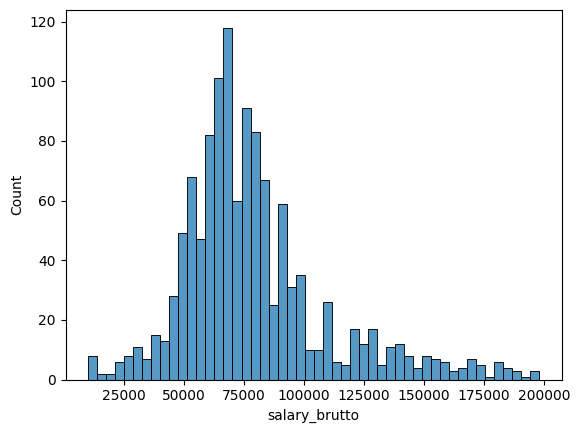

In [903]:
sns.histplot(df['salary_brutto'][df['salary_brutto'] < 2*(10**5)], bins=50)

In [904]:
list(df['salary_brutto'].sort_values(ascending=False).head(5))

[99999999999.0, 5500000000.0, 1240000.0, 945000.0, 700000.0]

### Remove outliers

In [905]:
df = df[(df['salary_brutto'] < 2*(10**6))]

<Axes: xlabel='salary_brutto', ylabel='Count'>

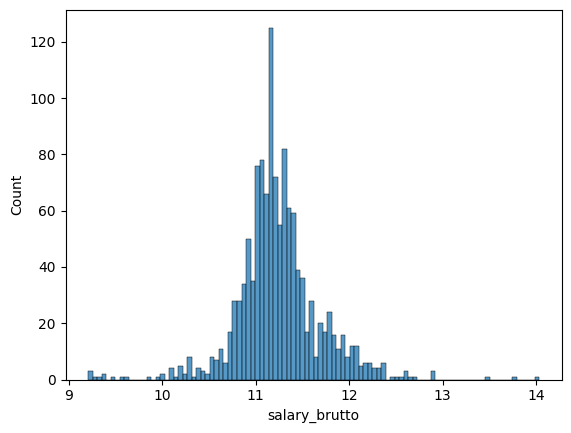

In [906]:
salary_logs = np.log1p(df['salary_brutto'])
sns.histplot(salary_logs, bins=100)

## Pick relevant columns

In [907]:
df.columns.values

array(['timestamp', 'age', 'gender', 'city', 'position',
       'experience_years', 'experience_years_germany', 'seniority_level',
       'main_technology', 'other_technologies',
       'salary_brutto_without_bonuses', 'yearly_bonus',
       'annual_brutto_salary_without_bonus_and_stocks_one_year_ago_only_answer_if_staying_in_the_same_country',
       'annual_bonus_stocks_one_year_ago_only_answer_if_staying_in_same_country',
       'vacation_days', 'employment_status', 'сontract_duration',
       'language_at_work', 'company_size', 'company_type',
       'have_you_lost_your_job_due_to_the_coronavirus_outbreak_',
       'have_you_been_forced_to_have_a_shorter_working_week_kurzarbeit_if_yes_how_many_hours_per_week',
       'have_you_received_additional_monetary_support_from_your_employer_due_to_work_from_home_if_yes_how_much_in_2020_in_eur',
       'salary_brutto'], dtype=object)

In [908]:
all_columns = ['age', 'gender', 'city', 'position',
       'experience_years', 'experience_years_germany', 'seniority_level',
       'main_technology', 'other_technologies',
       'vacation_days', 'employment_status', 'сontract_duration',
       'language_at_work', 'company_size', 'company_type',
       'salary_brutto']

In [909]:
df = df[all_columns].copy()
df

,age,gender,city,position,experience_years,experience_years_germany,seniority_level,main_technology,other_technologies,vacation_days,employment_status,сontract_duration,language_at_work,company_size,company_type,salary_brutto
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",26,Full-time employee,Unlimited contract,English,51-100,Product,142000.0
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,63000.0
1250,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,110000.0
1251,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",27,Full-time employee,Unlimited contract,German,101-1000,Product,79300.0


In [910]:
numerical = ['age','experience_years','experience_years_germany', 'vacation_days']
categorical = ['gender', 'city', 'position', 'seniority_level','main_technology', 'other_technologies', 'employment_status', 'сontract_duration',
       'language_at_work', 'company_size', 'company_type']

## Explore features

In [911]:
for c in numerical:
    print(c)
    print(df[c].unique())
    print()

age
[26. 29. 28. 37. 32. 24. 35. nan 34. 31. 41. 27. 25. 59. 36. 38. 40. 39.
 33. 30. 49. 48. 44. 66. 45. 43. 42. 46. 47. 56. 53. 65. 22. 23. 50. 51.
 21. 20. 54. 69. 52.]

experience_years
['5' '7' '12' '4' '17' '6' '8' '15' '2' '25' nan '14' '11' '18' '13' '30'
 '10' '3' '40' '26' '23' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5'
 '6.5' '21' '7.5' '2.5' '28' '29' '1,5' '24' '0' '4.5' '27'
 '1 (as QA Engineer) / 11 in total' '2,5' '15, thereof 8 as CTO' '31'
 '6 (not as a data scientist, but as a lab scientist)' '383' '3.5'
 'less than year']

experience_years_germany
['3' '4' '6' '1' '0.4' '2' '11' nan '5' '9' '30' '7' '15' '10' '18' '0'
 '8' '2.5' '1,5' '1.5' '0.5' '13' '14' '4,5' '3.5' '0.8' '1,7' '12' '3,5'
 '20' '0.9' '25' '< 1' '0.25' '4 (in Switzerland), 0 (in Germany)' '16'
 '17' '4 month' '19' '2,5' '0,5' '26' '3 months' '4.5' '0.1' '2.6'
 '3 (in Poland)' '<1' '⁰' '0,3' '-'
 '6 (not as a data scientist, but as a lab scientist)' '0.2'
 'less than year']

vacation_days
['30' '

In [912]:
for c in categorical:
    print(c)
    print(df[c].unique())
    print()

gender
['Male' 'Female' nan 'Diverse']

city
['Munich' 'Berlin' 'Hamburg' 'Wolfsburg' 'Stuttgart' 'Schleswig-Holstein'
 'London' 'Konstanz area' 'Frankfurt' 'Cologne' 'Kempten' 'Münster'
 'Erlangen' 'Vienna' 'Moldova' 'Rosenheim' 'Mannheim ' 'Boeblingen'
 'Düsseldorf' 'Ingolstadt' 'Nürnberg' 'Ansbach' 'Leipzig' 'Mannheim'
 'Tuttlingen' 'Bonn' 'Moscow' 'Koblenz' 'Warsaw' 'Heidelberg' 'Karlsruhe'
 'Köln' 'Aachen' 'Karlsruhe ' 'Samara' 'Riga, Latvia' 'Dusseldorf'
 'Zurich' 'Helsinki' 'Würzburg' 'Kiev' 'Den Haag' 'Amsterdam' 'Cracovia'
 'Tallinn' 'Prague' 'Utrecht' 'Stockholm' 'Braunschweig ' 'Dresden' 'Kyiv'
 'Stuttgart ' 'Malta' 'Lübeck' 'Nuremberg ' 'Bodensee' 'Milan' 'Salzburg'
 'Rome' 'Wroclaw' 'Cupertino' 'Paris' 'Dublin ' 'Paderborn' 'Konstanz'
 'Ulm' 'Düsseldorf ' 'Barcelona' 'Bölingen' 'Tampere (Finland)' 'Hannover'
 'Bucharest' 'Siegen' 'Minsk' 'Nuremberg' 'Marseille' 'Friedrichshafen'
 'Walldorf' 'Eindhoven' 'France' 'Regensburg' 'Warsaw, Poland' 'Heilbronn'
 'Dortmund' 'Jena' '

In [913]:
df.isnull().sum()

age                          26
gender                        9
city                          0
position                      5
experience_years             15
experience_years_germany     31
seniority_level              11
main_technology             126
other_technologies          155
vacation_days                67
employment_status            16
сontract_duration            28
language_at_work             15
company_size                 17
company_type                 24
salary_brutto                 0
dtype: int64

### age

In [914]:
df['age'].mean()

32.51265306122449

### experience years

In [915]:
pd.to_numeric(df['experience_years'], errors='coerce').mean()

9.084703010577705

### experience years in germany

In [916]:
pd.to_numeric(df['experience_years_germany'], errors='coerce').mean()

3.760268231349539

### vacation days
The column is converted from categorical into numerical

In [917]:
pd.to_numeric(df['vacation_days'], errors='coerce').mean()

28.288215200683176

### company size

In [918]:
df['company_size'].fillna('1000+').value_counts()

company_size
1000+       465
101-1000    405
11-50       174
51-100      147
up to 10     60
Name: count, dtype: int64

### company type

In [919]:
df['company_type'].value_counts()

company_type
Product                                                                     760
Startup                                                                     251
Consulting / Agency                                                         142
Bank                                                                          5
Media                                                                         3
E-commerce                                                                    3
Fintech                                                                       2
Utilities                                                                     2
Finance                                                                       2
Corporation                                                                   2
Research                                                                      2
University                                                                    2
corporate incubator        

### language

In [920]:
def map_language(lang: str):
    # Since the survey mainly contains respondents from Germany (based on the city), I assumend that 50/50 or 'both' implies English & German.
    # So I've selected English as the main language
    if ('english' in lang) or lang == 'deuglisch' or lang == '50/50' or lang == 'both':
        return 'english'
    if lang == 'русский':
        return 'russian'
        
    return lang

df['language_at_work'].fillna('english').str.lower().apply(map_language).value_counts()

language_at_work
english    1040
german      186
russian      14
italian       3
spanish       3
polish        2
czech         2
french        1
Name: count, dtype: int64

### contract duration

In [921]:
df['сontract_duration'].str.split(' ').str.get(0).str.lower().replace({'0': 'temporary'}).value_counts()

сontract_duration
unlimited    1158
temporary      65
Name: count, dtype: int64

### employment status
The column is converted from categorical into numerical

In [922]:
df['employment_status'].str.lower().str.contains('full').fillna(True).value_counts()

employment_status
True     1207
False      44
Name: count, dtype: int64

### Converting values into columns
This function converts comma separated values of a column into a separate columns of a new dataframe.
Each column of the new dataframe indicates whether this value is present in the row(1) or not(0)
Nan are replaced with an empty string and all values are lowered

In [923]:

def extract_values_into_df(original_df: pd.DataFrame, column: str, prefix: str):
    original_column_low = original_df[column].fillna('').str.lower()
    col_arrays = original_column_low.str.split(',')
    
    values_unique = set()
    for arr in col_arrays:
        for item in arr:
            if item.strip() != '':
                values_unique.add(item.strip())
    
    new_columns = {}
    for value in values_unique:
        new_columns[f'{prefix}_{value}'] = original_column_low.str.contains(value, regex=False)
    
    return pd.DataFrame(new_columns)

### other technologies
Not adding other technologies to the training set for now. First we will test the main technology list

In [924]:
extract_values_into_df(df, 'other_technologies', 'ot').head(5)

,ot_scala spark,ot_r,ot_react,ot_postgresql,ot_mongodb,ot_apache hadoop,ot_figma,ot_julia,ot_hadoop hive,ot_sap / abap,...,ot_spark,ot_tailwindcss,ot_qt,ot_node,ot_networking,ot_packer,ot_css; adobe xd,ot_pytorch,ot_quorum,ot_matlab
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### main technology

In [925]:
extract_values_into_df(df, 'main_technology', 'mt').head(5)

,mt_tricentis tosca,mt_magento,mt_dc management,mt_ios,mt_r,mt_react,mt_kubrrnetes,mt_ts,mt_figma,mt_gtm,...,mt_powershell,mt_javscript,mt_puppet,mt_pytorch,mt_automation,mt_react.js,mt_pyrhon,mt_abap,mt_python/sql,mt_matlab
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### seniority level

In [926]:
df['seniority_level'].str.lower().fillna('middle').value_counts()

seniority_level
senior                                       565
middle                                       376
lead                                         166
junior                                        79
head                                          44
principal                                      3
student                                        2
intern                                         2
c-level executive manager                      1
entry level                                    1
working student                                1
c-level                                        1
no idea, there are no ranges in the firm       1
director                                       1
key                                            1
no level                                       1
cto                                            1
work center manager                            1
manager                                        1
vp                                             1
no l

### position

In [927]:
df['position'].str.lower().fillna('software engineer').value_counts().head(10)

position
software engineer     392
backend developer     174
data scientist        110
frontend developer     89
qa engineer            71
devops                 57
mobile developer       53
ml engineer            41
product manager        39
data engineer          26
Name: count, dtype: int64

### gender

In [928]:
df['gender'].str.lower().fillna('male').value_counts()

gender
male       1058
female      191
diverse       2
Name: count, dtype: int64

### city

In [929]:
df['city'].str.lower().value_counts().head(10)

city
berlin        680
munich        236
frankfurt      44
hamburg        40
stuttgart      26
cologne        19
amsterdam       9
stuttgart       7
karlsruhe       6
prague          6
Name: count, dtype: int64

## Prepare training data

In [930]:
def fillna_mean(series: pd.Series):
    series_temp = pd.to_numeric(series, errors='coerce')
    mean = series_temp.mean()
    return series_temp.fillna(mean)
    
def prepare(original_df: pd.DataFrame, include_main_tech = False):
    df = original_df.copy()
    
    df['age'] = fillna_mean(df['age'])
    df['experience_years'] = fillna_mean(df['experience_years'])
    df['experience_years_germany'] = fillna_mean(df['experience_years_germany'])
    df['vacation_days'] = fillna_mean(df['vacation_days'])
    
    df['company_size'] = df['company_size'].str.lower().fillna('1000+')
    df['company_type'] = df['company_type'].str.lower().fillna('other')
    df['language_at_work'] = df['language_at_work'].fillna('english').str.lower().apply(map_language)
    df['сontract_duration'] = df['сontract_duration'].str.split(' ').str.get(0).str.lower().replace({'0': 'temporary'}).fillna('unlimited')

    df['full_employment'] = df['employment_status'].str.lower().str.contains('full').fillna(True)
    del df['employment_status'] 
    
    df['seniority_level'] = df['seniority_level'].str.lower().fillna('middle')
    df['position'] = df['position'].str.lower().fillna('software engineer')
    df['gender'] = df['gender'].str.lower().fillna('male')
    df['city'] = df['city'].str.lower()
    
    main_tech_df = extract_values_into_df(df, 'main_technology', 'mt')
    del df['main_technology']
    del df['other_technologies']
    
    df['salary_brutto_log'] = np.log1p(df['salary_brutto'])
    del df['salary_brutto']
    
    if include_main_tech:
        return pd.merge(df, main_tech_df, left_index=True, right_index=True)

    return df

In [931]:
prepared_df = prepare(df)
prepared_df.head(5)

,age,gender,city,position,experience_years,experience_years_germany,seniority_level,vacation_days,сontract_duration,language_at_work,company_size,company_type,full_employment,salary_brutto_log
0,26.0,male,munich,software engineer,5.0,3.0,senior,30.0,unlimited,english,51-100,product,True,11.350418
1,26.0,male,berlin,backend developer,7.0,4.0,senior,28.0,unlimited,english,101-1000,product,True,11.289794
2,29.0,male,berlin,software engineer,12.0,6.0,lead,30.0,temporary,english,101-1000,product,False,12.388398
3,28.0,male,berlin,frontend developer,4.0,1.0,junior,24.0,unlimited,english,51-100,startup,True,10.896758
4,37.0,male,berlin,backend developer,17.0,6.0,senior,29.0,unlimited,english,101-1000,product,True,11.034906


## Train model

In [932]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [933]:
SEED = 42

In [934]:
df_full_train, df_test = train_test_split(prepared_df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.salary_brutto_log.values
y_val = df_val.salary_brutto_log.values
y_test = df_test.salary_brutto_log.values

del df_train['salary_brutto_log']
del df_val['salary_brutto_log']
del df_test['salary_brutto_log']

In [935]:
train_columns = df_train.columns

### Training LinearRegression model

In [936]:
dv = DictVectorizer()

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [937]:
features_train = list(dv.get_feature_names_out())

In [938]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [939]:
mean_squared_error(y_val, y_pred, squared=False)

0.4236050203096213

In [940]:
from sklearn.model_selection import KFold

In [941]:
def train(df_train, y_train):
    dv = DictVectorizer()

    train_dict = df_train[train_columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df_val, dv, model):
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    return model.predict(X_val)

In [942]:
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)
mean_squared_error(y_val, y_pred, squared=False)

0.4236050203096213

In [943]:
dv_full_train, model_full_train = train(df_full_train, df_full_train.salary_brutto_log)
y_pred = predict(df_test, dv_full_train, model_full_train)
mean_squared_error(y_test, y_pred, squared=False)

0.36352157458141493

In [944]:
n_splits = 3

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train_fold = df_full_train.iloc[train_idx]
    df_val_fold = df_full_train.iloc[val_idx]

    y_train_fold = df_train_fold['salary_brutto_log'].values
    y_val_fold = df_val_fold['salary_brutto_log'].values

    dv_fold, model_fold = train(df_train_fold, y_train_fold)
    y_pred_fold = predict(df_val_fold, dv_fold, model_fold)

    mse = mean_squared_error(y_val_fold, y_pred_fold, squared=False)
    print(mse)
    scores.append(mse)

print('%.30f +- %.3f' % (np.mean(scores), np.std(scores)))

0.3900258107867034
0.40470458345150323
0.4068955944649366
0.400541996234381081354314346754 +- 0.007


### Training XGBoost model

In [945]:
import xgboost as xgb

In [946]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = SEED) 

In [947]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features_train)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features_train)

In [948]:
param = {"booster":"gblinear", "objective":"reg:squarederror"} 
xgb_r = xgb.train(params = param, dtrain = dtrain, num_boost_round = 10) 

In [949]:
pred = xgb_r.predict(dval) 

In [950]:
mean_squared_error(y_val, pred, squared=False)

0.41408113280100434

In [951]:
user = df.iloc[115].to_dict()
user

{'age': 24.0,
 'gender': 'Male',
 'city': 'Munich',
 'position': 'Software Engineer',
 'experience_years': '5',
 'experience_years_germany': '2',
 'seniority_level': 'Middle',
 'main_technology': 'C++',
 'other_technologies': 'Javascript / Typescript, Go',
 'vacation_days': '30',
 'employment_status': 'Full-time employee',
 'сontract_duration': 'Unlimited contract',
 'language_at_work': 'English',
 'company_size': '1000+',
 'company_type': 'Product',
 'salary_brutto': 135000.0}